In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from src.data import load_data_nn, load_data_cnn
from src.models import MLP, CNN
from src.train import train_model
from src.eval import evaluate_model
from utils.plot_utils import plot_misclassified_images, plot_training_graphs, display_confusion_matrix

In [2]:
# Set up reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
   print("CUDA")
else:
   print("Running on CPU")  

Running on CPU


In [3]:
batch_size = 64
num_epochs = 50

# --- Loading Data ---
train_loader_nn, val_loader_nn, test_loader_nn, x_test_nn, y_test_nn = load_data_nn(batch_size)

In [4]:
train_loader_iter = iter(train_loader_nn)
images, labels = next(train_loader_iter)

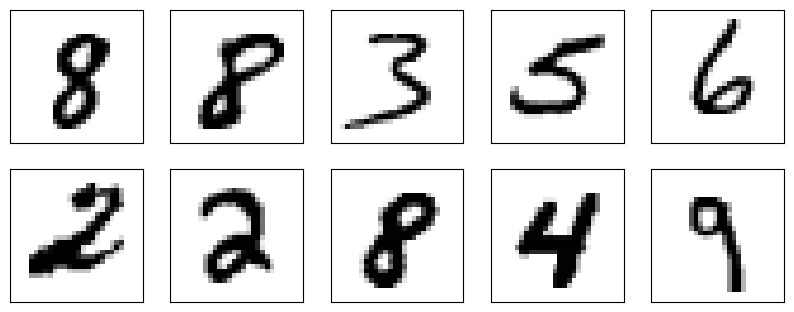

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

In [6]:
model_nn = MLP()
trained_model_nn, history_nn, training_time_nn = train_model(model_nn, train_loader_nn, val_loader_nn, "mlp", num_epochs)
print(f"Training time for NN: {training_time_nn:.2f} minutes.")


Epoch 1, Loss: 0.3260, Acc: 0.9065, Val Loss: 0.1386, Val Acc: 0.9585
Epoch 2, Loss: 0.1900, Acc: 0.9432, Val Loss: 0.1169, Val Acc: 0.9667
Epoch 3, Loss: 0.1537, Acc: 0.9536, Val Loss: 0.1024, Val Acc: 0.9682
Epoch 4, Loss: 0.1352, Acc: 0.9582, Val Loss: 0.0899, Val Acc: 0.9730
Epoch 5, Loss: 0.1264, Acc: 0.9618, Val Loss: 0.0895, Val Acc: 0.9742
Epoch 6, Loss: 0.1187, Acc: 0.9631, Val Loss: 0.0809, Val Acc: 0.9767
Epoch 7, Loss: 0.1124, Acc: 0.9651, Val Loss: 0.0821, Val Acc: 0.9760
Epoch 8, Loss: 0.1053, Acc: 0.9669, Val Loss: 0.0856, Val Acc: 0.9743
Epoch 9, Loss: 0.0995, Acc: 0.9682, Val Loss: 0.0750, Val Acc: 0.9765
Epoch 10, Loss: 0.0923, Acc: 0.9712, Val Loss: 0.0723, Val Acc: 0.9790
Epoch 11, Loss: 0.0933, Acc: 0.9707, Val Loss: 0.0725, Val Acc: 0.9789
Epoch 12, Loss: 0.0892, Acc: 0.9714, Val Loss: 0.0729, Val Acc: 0.9780
Epoch 13, Loss: 0.0915, Acc: 0.9708, Val Loss: 0.0737, Val Acc: 0.9788
Epoch 14, Loss: 0.0830, Acc: 0.9739, Val Loss: 0.0715, Val Acc: 0.9794
Epoch 15, Loss:

In [7]:
test_acc_nn, report_nn, cm_nn, test_preds_nn, test_labels_nn,summary_nn = evaluate_model(trained_model_nn, test_loader_nn)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              ReLU-2                  [-1, 256]               0
           Dropout-3                  [-1, 256]               0
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
       BatchNorm1d-8                  [-1, 128]             256
            Linear-9                   [-1, 10]           1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
-------------------------------------------

In [8]:
print(f"Test Accuracy for NN: {test_acc_nn * 100:.2f}%")

Test Accuracy for NN: 98.06%


In [9]:
from sklearn.metrics import classification_report
macro_f1_nn = classification_report(test_preds_nn, test_labels_nn, output_dict=True)['macro avg']['f1-score']
print(f"NN macro f1: {macro_f1_nn:.2f}")

NN macro f1: 0.98


In [10]:
trainable_params_nn = sum(p.numel() for p in model_nn.parameters() if p.requires_grad)
print(f"Trainable parameters NN: {trainable_params_nn}")


Trainable parameters NN: 235914


In [11]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



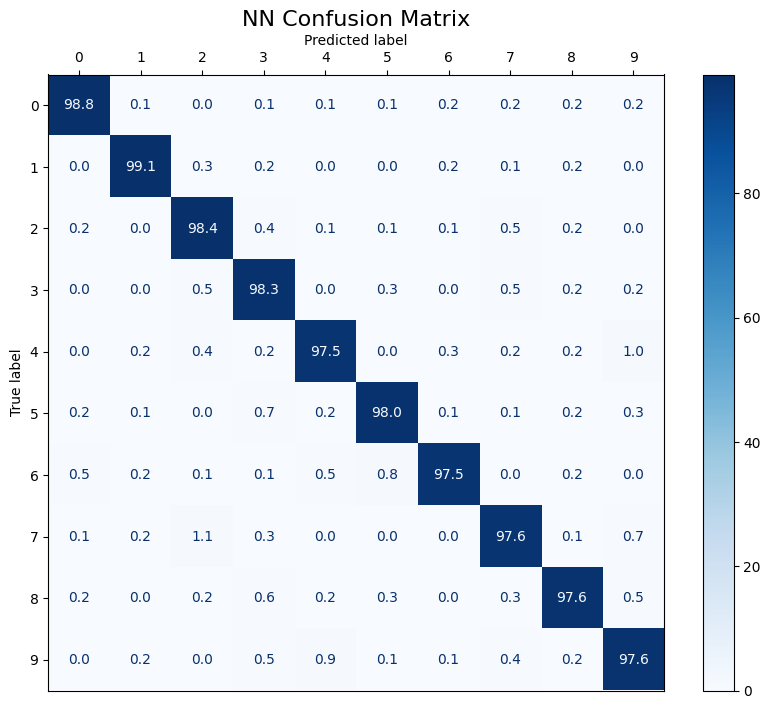

In [12]:

display_confusion_matrix(cm_nn, "NN Confusion Matrix")


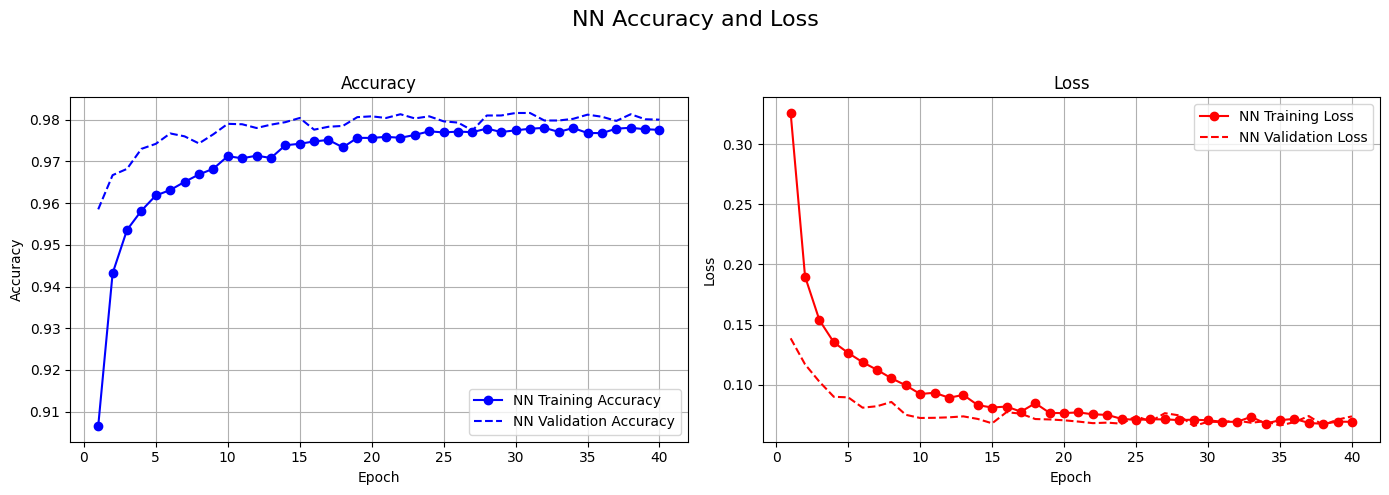

In [14]:
plot_training_graphs(history_nn, "NN", "NN Accuracy and Loss")

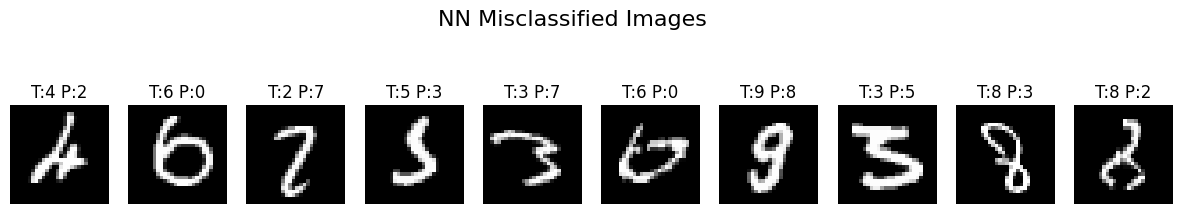

In [13]:
misclassified_nn = np.where(test_preds_nn != test_labels_nn)[0]
plot_misclassified_images(misclassified_nn, x_test_nn, y_test_nn, test_preds_nn, "NN Misclassified Images")


# 2. CNN

In [15]:
train_loader_cnn, val_loader_cnn, test_loader_cnn = load_data_cnn(batch_size)

In [16]:
model_cnn = CNN()


In [17]:
trained_model_cnn, history_cnn, training_time_cnn = train_model(model_cnn, train_loader_cnn, val_loader_cnn, "cnn", num_epochs)
print(f"Training time for CNN: {training_time_cnn:.2f} minutes.")


Epoch 1, Loss: 0.1372, Acc: 0.9575, Val Loss: 0.0639, Val Acc: 0.9803
Epoch 2, Loss: 0.0581, Acc: 0.9818, Val Loss: 0.0525, Val Acc: 0.9843
Epoch 3, Loss: 0.0483, Acc: 0.9853, Val Loss: 0.0443, Val Acc: 0.9866
Epoch 4, Loss: 0.0388, Acc: 0.9881, Val Loss: 0.0464, Val Acc: 0.9865
Epoch 5, Loss: 0.0364, Acc: 0.9883, Val Loss: 0.0406, Val Acc: 0.9884
Epoch 6, Loss: 0.0332, Acc: 0.9895, Val Loss: 0.0456, Val Acc: 0.9866
Epoch 7, Loss: 0.0326, Acc: 0.9898, Val Loss: 0.0447, Val Acc: 0.9884
Epoch 8, Loss: 0.0268, Acc: 0.9912, Val Loss: 0.0449, Val Acc: 0.9887
Epoch 9, Loss: 0.0281, Acc: 0.9912, Val Loss: 0.0386, Val Acc: 0.9889
Epoch 10, Loss: 0.0288, Acc: 0.9910, Val Loss: 0.0450, Val Acc: 0.9886
Epoch 11, Loss: 0.0257, Acc: 0.9914, Val Loss: 0.0415, Val Acc: 0.9878
Epoch 12, Loss: 0.0260, Acc: 0.9913, Val Loss: 0.0458, Val Acc: 0.9886
Epoch 13, Loss: 0.0247, Acc: 0.9919, Val Loss: 0.0374, Val Acc: 0.9901
Epoch 14, Loss: 0.0238, Acc: 0.9922, Val Loss: 0.0400, Val Acc: 0.9889
Epoch 15, Loss:

In [ ]:
test_acc_cnn, report_cnn, cm_cnn, test_preds_cnn, test_labels_cnn, summary_cnn = evaluate_model(trained_model_cnn, test_loader_cnn, is_cnn=True)


--- Evaluation of Convolutional Neural Network (CNN) Model ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
              ReLU-2          [-1, 128, 28, 28]               0
           Dropout-3          [-1, 128, 28, 28]               0
       BatchNorm2d-4          [-1, 128, 28, 28]             256
            Conv2d-5           [-1, 64, 28, 28]          73,792
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
           Dropout-8           [-1, 64, 14, 14]               0
       BatchNorm2d-9           [-1, 64, 14, 14]             128
          Flatten-10                [-1, 12544]               0
           Linear-11                  [-1, 124]       1,555,580
             ReLU-12                  [-1, 124]               0
           Linear-13                   

In [ ]:

print(report_cnn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
print(f"Test Accuracy: {test_acc_cnn * 100:.2f}%")

Test Accuracy: 99.15%


In [29]:
macro_f1_cnn = classification_report(test_preds_cnn, test_labels_cnn, output_dict=True)['macro avg']['f1-score']
print(f"CNN macro f1: {macro_f1_cnn:.2f}")
trainable_params_cnn = sum(p.numel() for p in model_cnn.parameters() if p.requires_grad)
print(f"Trainable parameters CNN: {trainable_params_cnn}")


CNN macro f1: 0.99
Trainable parameters CNN: 1632286


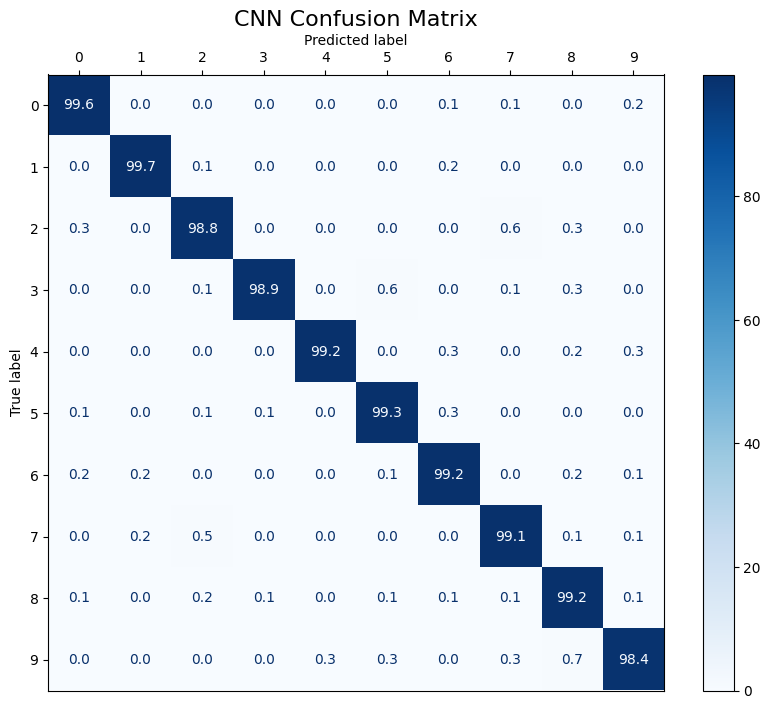

In [23]:
display_confusion_matrix(cm_cnn, "CNN Confusion Matrix")


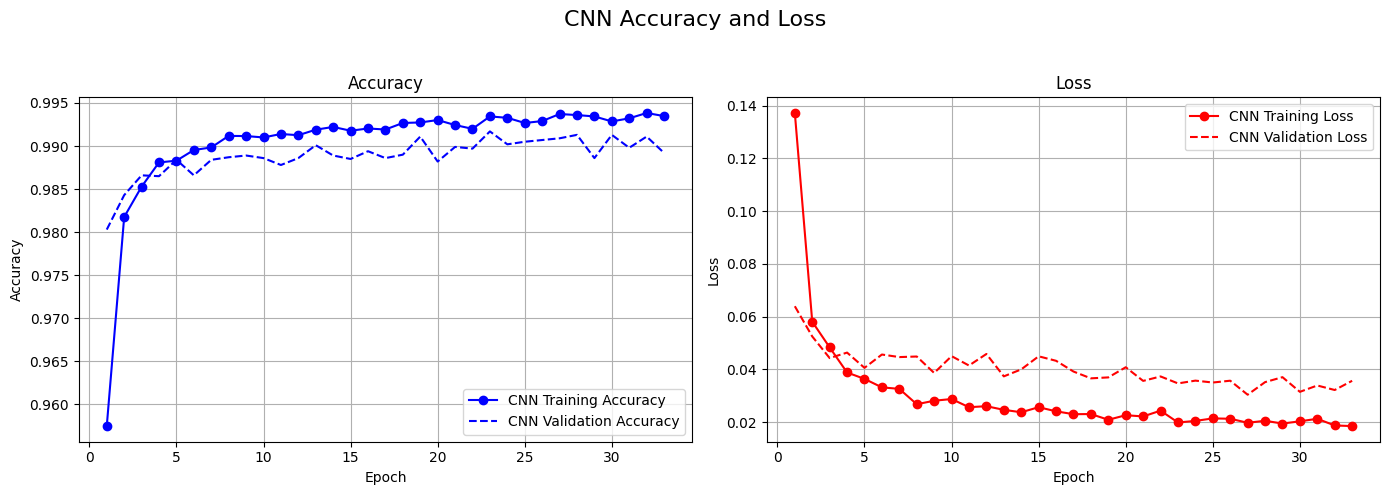

In [35]:
plot_training_graphs(history_cnn, "CNN", "CNN Accuracy and Loss")

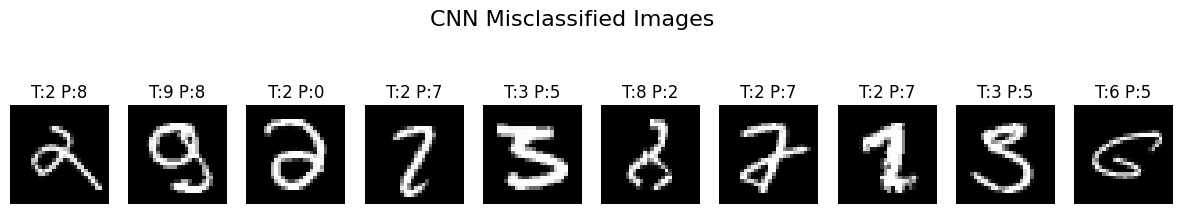

In [34]:
misclassified_cnn = np.where(test_preds_cnn != test_labels_cnn)[0]
plot_misclassified_images(misclassified_cnn, x_test_nn.squeeze(), y_test_nn, test_preds_cnn, "CNN Misclassified Images")



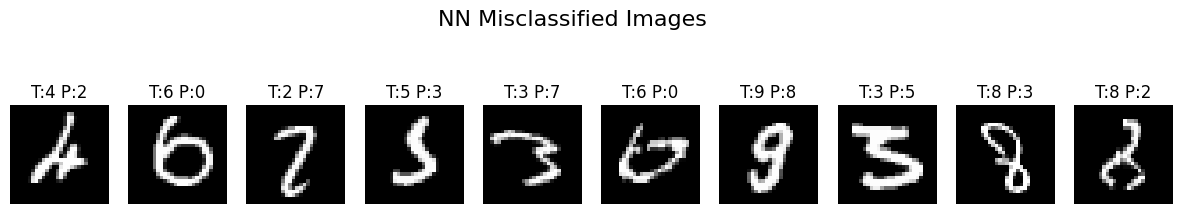

In [40]:
plot_misclassified_images(misclassified_nn, x_test_nn, y_test_nn, test_preds_nn, "NN Misclassified Images")


In [38]:
# first 10 misclassified index CNN
misclassified_cnn[:10]

array([ 149,  151,  318,  321,  449,  582,  583,  659,  938, 1014])

In [39]:
# first 10 misclassified index NN
misclassified_nn[:10]

array([247, 259, 321, 340, 381, 445, 448, 449, 543, 582])

> Below are incorrect predicted by CNN but correct classified by NN


In [41]:
#CNN predicted false
not_exists_nn = [x for x in misclassified_cnn if x not in misclassified_nn]
missclassified_index_cnn = not_exists_nn[0]
print(missclassified_index_cnn)

149


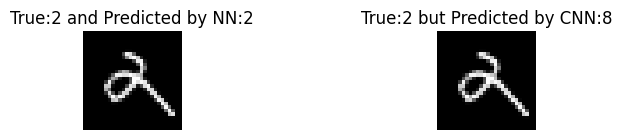

In [43]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[missclassified_index_cnn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_cnn]} and Predicted by NN:{test_preds_nn[missclassified_index_cnn]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[missclassified_index_cnn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_cnn]} but Predicted by CNN:{test_preds_cnn[missclassified_index_cnn]}")
plt.axis('off')

plt.show()

In [44]:
#NN predicted false
not_exists_cnn = [x for x in misclassified_nn if x not in misclassified_cnn]
missclassified_index_nn = not_exists_cnn[0]
print(missclassified_index_nn)

247


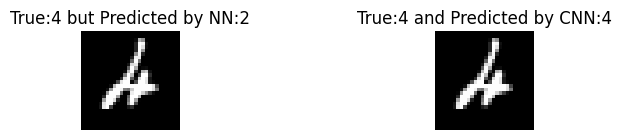

In [46]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[missclassified_index_nn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_nn]} but Predicted by NN:{test_preds_nn[missclassified_index_nn]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[missclassified_index_nn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_nn]} and Predicted by CNN:{test_preds_cnn[missclassified_index_nn]}")
plt.axis('off')

plt.show()

### those digits predicted incorrect by both NN and CNN

In [49]:
common_misclassified = list(set(misclassified_nn[:10]) & set(misclassified_cnn[:10]))[0]
print("common misclassified",common_misclassified)

common misclassified 321


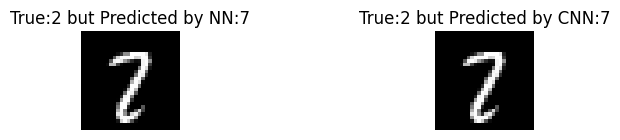

In [51]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[common_misclassified], cmap='gray')
plt.title(f"True:{y_test_nn[common_misclassified]} but Predicted by NN:{test_preds_nn[common_misclassified]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[common_misclassified], cmap='gray')
plt.title(f"True:{y_test_nn[common_misclassified]} but Predicted by CNN:{test_preds_cnn[common_misclassified]}")
plt.axis('off')

plt.show()

In [63]:
results = []

   
results.append({
    "Model": "MLP",
    "#Params": trainable_params_nn,
    "Training Time (min)": round(training_time_nn, 2),
    "Test Acc %": round(test_acc_nn*100, 2),
    "Macro-F1": round(macro_f1_nn, 2),
    "avg time per epoch (min)":round(training_time_nn/len(history_nn["loss"]),2)
})

results.append({
    "Model": "CNN",
    "#Params": trainable_params_cnn,
    "Training Time (min)": round(training_time_cnn, 2),
    "Test Acc %": round(test_acc_cnn*100, 2),
    "Macro-F1": round(macro_f1_cnn, 2),
     "avg time per epoch (min)":round(training_time_cnn/len(history_cnn["loss"]),2)
})

In [68]:
len(history_nn["loss"])

40

In [64]:
import pandas as pd
df = pd.DataFrame(results)

In [65]:
df.head()

,Model,#Params,Training Time (min),Test Acc %,Macro-F1,avg time per epoch (min)
0,MLP,235914,6.55,98.06,0.98,0.16
1,CNN,1632286,367.60,99.15,0.99,11.14
